<!-- 00:00–02:00 (2 min) -->
# Clase 5 — Módulos

Hoy: ver módulos como **cajas de herramientas**.

- Biblioteca estándar (viene con Python)
- Módulos externos (se instalan)
- Importar = **decidir cómo accedemos** a esas herramientas


<!-- 02:00–04:00 (2 min) -->
## Objetivos

1. Importar funciones con `math`
2. Instalar módulos externos con `pip`
3. Núcleo: **NumPy** (`range` vs `linspace`)
4. Demos cortos: `turtle`, `psychopy`, `Pillow`, `folium`
5. Cierre: cómo elegir el módulo adecuado


<!-- 04:00–06:00 (2 min) -->
## Idea clave

Un módulo es, en la práctica:

> **un archivo lleno de funciones** (y a veces otras cosas)

Ya lo vimos con:
- `math` (estándar)


<!-- 06:00–08:00 (2 min) -->
## Importar funciones: dos formas comunes

#### 1) Importar solo lo que usarás

```python
from math import sin
```

#### 2) Importar todo (mala idea)

```python
from math import *
```

**Por qué es mala idea:** “ensucia” el espacio de nombres y dificulta leer el código (colisiones de nombres).


<!-- 08:00–12:00 (4 min) -->
## Demo breve con `math`

Usaremos `sin` para calcular una señal simple (en radianes).


In [ ]:
import math 

valores = [0.0, 0.5, 1.0, 1.5]
for x in valores:
    print(f"x={x:.1f}  sin(x)={math.sin(x):.4f}")

<!-- 12:00–14:00 (2 min) -->
## Nota: `from math import *`

Lo verás en internet, pero **evítalo**.

En este curso priorizamos que el código sea:
- legible
- fácil de revisar
- fácil de mantener


<!-- 14:00–18:00 (4 min) -->
## Módulos externos: instalación con `pip` desde Jupyter

Si intentas `import X` y aparece `ModuleNotFoundError`, normalmente significa:

> el módulo **no está instalado** en este entorno.

En Jupyter puedes instalar así:

```python
!pip install nombre_paquete
```

Hoy veremos: `numpy`, `psychopy`, `pillow`, `folium`.


In [ ]:
# (Paso técnico) Instalar módulos externos si hace falta.
# Nota: puede requerir conexión a internet y permisos del entorno.
# Ejecuta solo si ves ModuleNotFoundError en imports posteriores.

# !pip install numpy psychopy pillow folium


<!-- 16:00–18:00 (2 min) -->
## NumPy: Historia y "Features"

**NumPy** es el módulo base para **cálculo numérico** en Python.

- Aparece en **2005** (Travis Oliphant) para trabajar con **muchos números de forma eficiente**
- Introduce los **arreglos numéricos (`ndarray`)**
- Es la base de todo el ecosistema científico  
  *(SciPy, Pandas, Matplotlib, machine learning)*

::: {.fragment}
**Applicaciones principales:**

- Arreglos de números **homogéneos**
- Operaciones matemáticas **vectorizadas** (sin `for`)
- Mucho más **rápido** que listas de Python
:::

<!-- 18:00–20:00 (2 min) -->
# NumPy: números y arreglos

**Objetivo**: generar listas/arreglos de valores para cálculos.

Dos ideas:

- `range(...)` → enteros con paso fijo
- `np.linspace(a, b, n)` → **n puntos** igualmente espaciados (floats)


<!-- 20:00–26:00 (6 min) -->
## `range`: útil para contar y repetir

- Produce enteros
- Paso constante
- Muy común con `for`

Ejemplo: 0, 2, 4, 6, 8


In [ ]:
for k in range(0, 10, 1):
    print(k)

<!-- 26:00–34:00 (8 min) -->
## `np.linspace`: útil para muestrear un intervalo

- Produce floats
- Controlas el **número de puntos**
- Ideal para “barrer” un rango (tiempo, temperatura, distancia, etc.)


In [ ]:
import numpy as np

xs = np.linspace(0.0, 1.0, 6)   # 6 puntos entre 0 y 1 (incluye extremos)
for x in xs:
    print(f"{x:.3f}")


In [ ]:
array_largo = np.linspace(0.0, 10000, 1000)
array_largo

<!-- 34:00–40:00 (6 min) -->
## Comparación directa: `range` vs `linspace`

Pregunta guía:

> ¿quiero un **paso** fijo (range) o un **número de puntos** fijo (linspace)?

Veamos ambos en un ejemplo lado a lado.


In [ ]:
import numpy as np

# 6 enteros desde 0 a 5
a = list(range(0, 6))

# 6 puntos igualmente espaciados entre 0 y 5
b = np.linspace(0, 5, 6)

print("range ->", a)
print("linspace ->", [float(x) for x in b])


<!-- 40:00–50:00 (10 min) -->
## Ejercicio: muestreo y conteo

1. Crea `xs = np.linspace(0, 10, 11)` (11 puntos entre 0 y 10).
2. Recorre `xs` con un `for`.
3. Cuenta cuántos valores cumplen: `x >= 3` y `x <= 7`.

Pista: usa un acumulador `conteo = 0` y un `if`.


## Solución:

In [ ]:
xd = np.linspace(0, 10, 11)

conteo = 0

for x in xd:
    if x >=3 and x<=7:
        conteo = conteo + 1
    
print(f"conteo final : {conteo}")

<!-- 50:00–54:00 (4 min) -->
## Solución 

In [ ]:
import numpy as np

xs = np.linspace(0, 10, 11)
conteo = 0
for x in xs:
    if (x >= 3) and (x <= 7):
        conteo = conteo + 1

print("conteo =", conteo)


<!-- 54:00–58:00 (4 min) -->
## NumPy demo: regresión lineal

Queremos ajustar una recta:

$$ m x + b $$

a un conjunto de puntos \((x, y)\).

- generar datos con `np.linspace`
- calcular `m` y `b` con una fórmula (sin magia)


<!-- 58:00–64:00 (6 min) -->
## Regresión lineal: demo mínimo 

1) Generamos datos (con una tendencia lineal)  
2) Calculamos el ajuste \(m, b\)  
3) Usamos la recta para predecir valores


In [ ]:
import numpy as np

# 1. Datos
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# 2. Regresión Lineal (Ajuste de grado 1)
m, b = np.polyfit(x, y, 1)

# 3. Salida
print(f"Ecuación: y = {m:.2f}x + {b:.2f}")


<!-- 14:00–16:00 (2 min) -->
# Módulos externos en Python

Python tiene un **ecosistema enorme** de módulos.

- **Cientos de miles** de módulos disponibles (PyPI)
- Extienden Python para casi cualquier tarea

:::{.fragment}
**¿Por qué existen tantos?**

- El código se puede **reutilizar**
- Es fácil **compartir soluciones**
- Muchas personas construyen herramientas para otros

> Python crece porque su comunidad escribe módulos.
:::


<!-- 64:00–66:00 (2 min) -->
## `turtle` — ¿para qué sirve?

- Dibujo simple
- Geometría visual
- Pensamiento paso a paso (ver el efecto de cada instrucción)


<!-- 66:00–70:00 (4 min) -->
## `turtle` — ejemplo mínimo

Dibujamos un cuadrado con un `for`.


In [ ]:
import turtle

turtle.clearscreen()


t = turtle.Turtle()
t.speed(5)

for _ in range(1000):
    t.forward(60)
    t.left(90)
    t.right(60)

turtle.done()



<!-- 70:00–72:00 (2 min) -->
## `psychopy` — ¿para qué sirve?

- Experimentos en psicología (estímulos y tiempos)
- Presentación visual/sonora y control de respuesta

::: {.callout-note .fragment}
Puede requerir instalación y un entorno gráfico compatible.
::: 

<!-- 72:00–76:00 (4 min) -->
## `psychopy` — ejemplo mínimo

Ejemplo mínimo: ventana + texto por 1.5 s.


In [ ]:
# !pip install psychopy

from psychopy import visual, core

win = visual.Window(size=(800, 400))
texto = visual.TextStim(win, text="Hola, PsychoPy")
texto.draw()
win.flip()
core.wait(1.5)
win.close()


<!-- 76:00–78:00 (2 min) -->
## `Pillow (PIL)` — ¿para qué sirve?

- Crear y transformar imágenes
- Operaciones simples (tamaño, recorte, conversión)

Hoy: todo en memoria, sin enseñar lectura/escritura de archivos.


<!-- 78:00–82:00 (4 min) -->
## `Pillow (PIL)` — ejemplo mínimo

Creamos una imagen y la redimensionamos.


tamaño original: (120, 80)
tamaño nuevo: (240, 160)


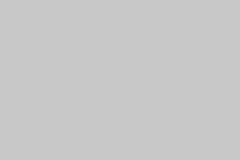

In [9]:
# !pip install pillow

from PIL import Image

img = Image.new("RGB", (120, 80), color=(200, 200, 200))  # imagen gris
img2 = img.resize((240, 160))

print("tamaño original:", img.size)
print("tamaño nuevo:", img2.size)

img2  # en Jupyter se muestra como imagen


<!-- 82:00–84:00 (2 min) -->
## `folium` — ¿para qué sirve?

- Mapas interactivos
- Marcadores y capas simples
- Útil para datos geográficos (geo)



<!-- 84:00–88:00 (4 min) -->
## `folium` — ejemplo mínimo

Mapa centrado en coordenadas + un marcador.


In [19]:
# !pip install folium

import folium

centro = (-36.8270, -73.003)

m = folium.Map(location=centro, zoom_start=12)
folium.Marker(location=centro, popup="Centro").add_to(m)

m


<!-- 88:00–92:00 (4 min) -->
## Cierre

- Importar una función: `from modulo import funcion`
- Evitar `from modulo import *`
- Módulos externos: instalar con `!pip install ...`
- NumPy: `range` vs `linspace` (paso vs número de puntos)
- Demos: `turtle` (dibujo), `psychopy` (experimentos), `PIL` (imágenes), `folium` (mapas)
